In [4]:
%load_ext autoreload
%autoreload
%matplotlib inline
%config IPCompleter.greedy=True
import warnings,copy
warnings.filterwarnings('ignore')


#python -m ipykernel install --user --name py36 --display-name py36b
# λ python -m ipykernel install --user --name py36 --display-name py36b
#Installed kernelspec py36 in C:\Users\dellbook\AppData\Roaming\jupyter\kernels\py36                                                   







In [5]:
from allimport import *


from source import util_feature

imported <module 'lightgbm' from 'D:\\_devs\\Python01\\ana3\\envs\\py36\\lib\\site-packages\\lightgbm\\__init__.py'>
os.getcwd D:\_devs\Python01\gitdev\dsa2


In [6]:
###### Import custom packages ###########################
print( os.getcwd())



D:\_devs\Python01\gitdev\dsa2


In [8]:
root      = os.getcwd()
dir_data  = os.path.abspath( root + "/data/" ) + "/"
dir_data  = dir_data.replace("\\", "/")

print(dir_data)


D:/_devs/Python01/gitdev/dsa2/data/


In [10]:
import os, sys
print(os, sys)

<module 'os' from 'D:\\_devs\\Python01\\ana3\\envs\\py36\\lib\\os.py'> <module 'sys' (built-in)>


(600000, 435) (400000, 435)


# Model Fitting check




In [15]:
### Train, save the model
"""
Data is provided in /data/input/train/


"""

! activate py36 && python source/run_train.py  run_train --model_name bayesian_pyro  --path_output /data/output/a01_bayesian2/  --n_sample 100 --path_data /data/input/train/ 


### Check run
# ! python source/run_train.py  run_train --model_name bayesian_pyro  --path_output /data/output/a01_bayesian_test/  --n_sample 2000 --path_data /data/input/train/ 


 




D:\_devs\Python01\gitdev\dsa2>conda.bat activate py36 
D:/_devs/Python01/gitdev/dsa2/
os.getcwd D:\_devs\Python01\gitdev\dsa2
  ('D:/_devs/Python01/gitdev/dsa2//data/output/a01_bayesian2/',) 
  ('#### load input column family  ###################################################',) 
  ({'coly': 'salary', 'colid': 'jobId', 'colcat': ['companyId', 'jobType', 'degree', 'major', 'industry'], 'colnum': ['yearsExperience', 'milesFromMetropolis'], 'coltext': [], 'coldate': [], 'colcross': ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']},) 
  ('#### Model loading  ##############################################################',) 
  ('D:\\_devs\\Python01\\gitdev\\dsa2',) 
  ('#### Preprocess  #################################################################',) 
  ({'coly': 'salary', 'colid': 'jobId', 'colcat': ['companyId', 'jobType', 'degree', 'major', 'industry'], 'colnum': ['yearsExperience', 'milesFromMetropolis'], 'coltext': [], 'coldate': [], 'colcross

In [55]:
#### Load trained model as Singleton Class
from source.util_feature import load
from source.models import model_bayesian_pyro as modelx
model_tag =  "a01_bayesian"


#### Load model
dir_model = dir_data + f"/output/{model_tag}/"
modelx.model = load( dir_model + "/model/model.pkl" ) 
stats  = load( dir_model + "/model/info.pkl" ) 
colsX  = load( dir_model + "/model/colsX.pkl"   )
coly   = load( dir_model + "/model/coly.pkl"   )
print(stats)
print(modelx.model.model)
print(modelx.model.pred_summary.keys() )

pred_samples = modelx.model.pred_summary['pred_samples']



{'metrics_test':                 metric_name  metric_val  n_sample
0   root_mean_squared_error   19.868467     80000
1       mean_absolute_error   16.069969     80000
2  explained_variance_score    0.741302     80000
3                  r2_score    0.737887     80000
4     median_absolute_error   13.974678     80000}
BayesianRegression(
  (linear): PyroLinear(in_features=112, out_features=1, bias=True)
)
dict_keys(['pred_mean', 'pred_summary', 'pred_samples'])


In [51]:
print(modelx.model.compute_pars)




{'compute_pars': {'n_iter': 1200, 'learning_rate': 0.01}, 'metric_list': ['root_mean_squared_error', 'mean_absolute_error', 'explained_variance_score', 'r2_score', 'median_absolute_error'], 'max_size': 1000000}


In [33]:
### Metrics on test data
stats['metrics_test']



,metric_name,metric_val,n_sample
0,root_mean_squared_error,19.868467,80000
1,mean_absolute_error,16.069969,80000
2,explained_variance_score,0.741302,80000
3,r2_score,0.737887,80000
4,median_absolute_error,13.974678,80000


In [ ]:
"""
Having K-Folds, Out of Samples statistics is better.
However, we use 1-fold on test data.

Model metrics show
    Explained variance :  74%,  of "Salary" variance explained by the model
    MAE  :   16.01,  Average of absolute diff between actual salary vs predicted salary


Metrics are slightby below LightGBM one

"""

In [28]:
#### Loading training data  ###############################################
dfX = pd.read_parquet(dir_model + "/check/dfX.parquet")
dfy =  dfX[coly]
colused  = colsX

dfXtest = pd.read_parquet(dir_model + "/check/dfXtest.parquet")
dfytest =  dfXtest[coly]

print(dfX.shape,  dfXtest.shape )



(8000, 285) (2000, 285)


# Regression weight Distribution from samples

In [ ]:
"""

Bayesian model allows to plot the posterior distribution of the weights as well as the output.

"""

In [56]:
pred_samples

{'linear.weight': tensor([[[[-0.2217, -0.2019, -0.1916,  ..., -0.1656, -0.2448, -0.1948]]],
 
 
         [[[-0.2146, -0.2032, -0.1922,  ..., -0.1650, -0.2441, -0.1997]]],
 
 
         [[[-0.2179, -0.2002, -0.1924,  ..., -0.1666, -0.2439, -0.1964]]],
 
 
         ...,
 
 
         [[[-0.2148, -0.2029, -0.1884,  ..., -0.1701, -0.2407, -0.1955]]],
 
 
         [[[-0.2180, -0.2065, -0.1931,  ..., -0.1718, -0.2481, -0.1935]]],
 
 
         [[[-0.2157, -0.2050, -0.1898,  ..., -0.1600, -0.2400, -0.1925]]]],
        requires_grad=True),
 'obs': tensor([[0.6015, 0.4785, 0.6341,  ..., 0.4554, 0.5086, 0.7507],
         [0.6126, 0.5363, 0.5660,  ..., 0.4725, 0.6382, 0.8260],
         [0.6520, 0.5158, 0.6648,  ..., 0.4059, 0.4206, 0.7696],
         ...,
         [0.5987, 0.5039, 0.5886,  ..., 0.4289, 0.4809, 0.5992],
         [0.6459, 0.5698, 0.5404,  ..., 0.4411, 0.6005, 0.6736],
         [0.5372, 0.5532, 0.5904,  ..., 0.4792, 0.4684, 0.7128]],
        requires_grad=True),
 '_RETURN': tensor([[0.6

In [74]:
weight = pred_samples["linear.weight"]
weight = weight.reshape(weight.shape[0], 112)
weight[:,0].size()

torch.Size([500])

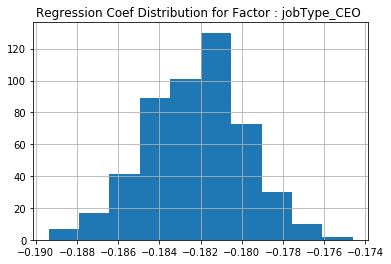

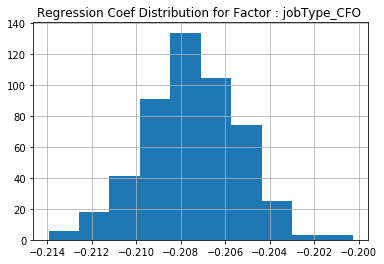

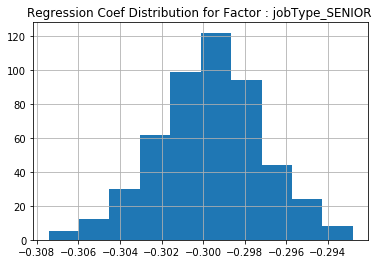

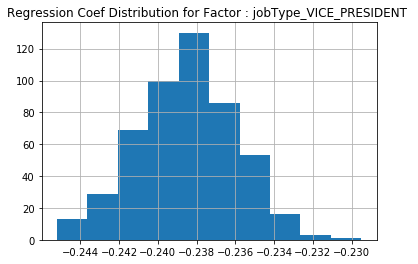

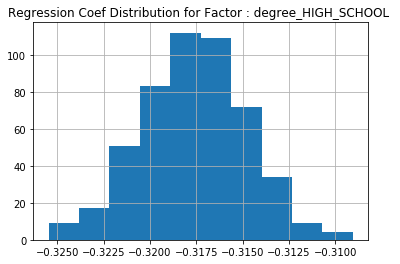

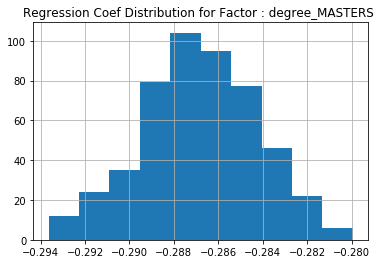

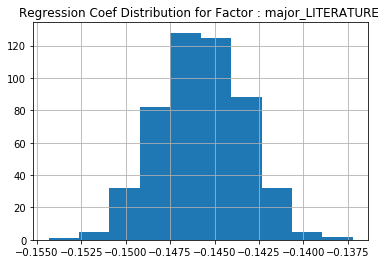

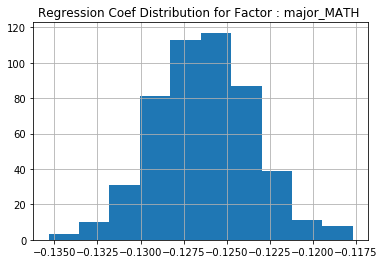

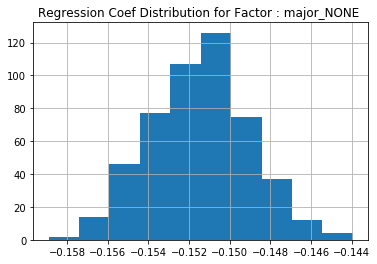

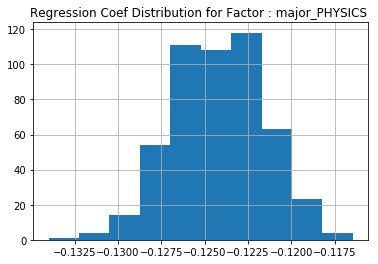

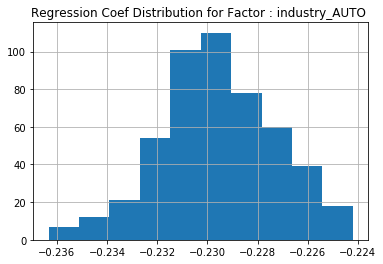

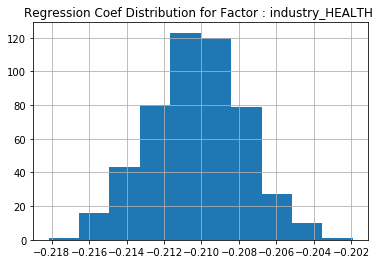

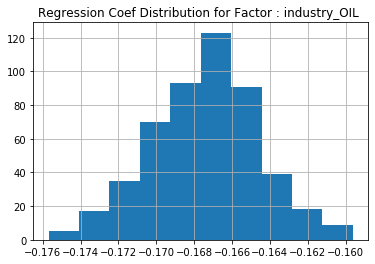

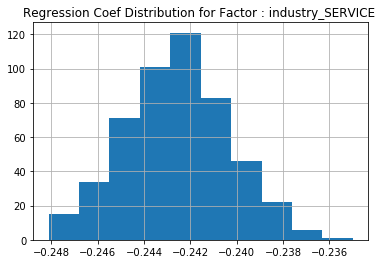

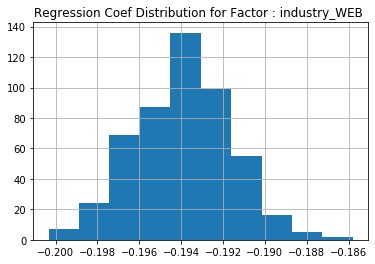

In [81]:
ll = [
  'jobType_CEO',
 'jobType_CFO',
 'jobType_SENIOR',
 'jobType_VICE_PRESIDENT',
 'degree_HIGH_SCHOOL',
 'degree_MASTERS',
 'major_LITERATURE',
 'major_MATH',
 'major_NONE',
 'major_PHYSICS',
 'industry_AUTO',
 'industry_HEALTH',
 'industry_OIL',
 'industry_SERVICE',
 'industry_WEB'   
    
]
for ci in ll :
    i0 = colsX.index(ci)
    pd.DataFrame( weight[:,i0].detach().numpy(), columns= [ f"Regression Coef Distribution for Factor : {ci} " ]  ).hist()
    
    
    
    